# Importing Libraries

In [65]:
import pandas as pd     #perform a wide variety of mathematical operations on arrays
import numpy as np     #analyzing, cleaning, exploring, and manipulating data.
import seaborn as sns   #provides statistical graphics for statistical data analysis
import matplotlib.pyplot as plt  #for creating static, animated, and interactive visualizations in Python. 

# Loading Data

In [66]:
df = pd.read_csv("/kaggle/input/sales-data/all_data.csv")
df.sort_index(inplace = True)   #sorting data in ascending order
df   #to display the first 5 rows of the dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


# Data cleaning

In [67]:
df.columns     #to return the column labels of the given Dataframe

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [68]:
df.shape     #used to get the dimensions of any Python 

(186850, 6)

In [69]:
df.info()   #prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


FINDING THE NULL VALUES AND DELETING THEM

In [70]:
df.isnull().sum()   #function returns the number of NaN values in all columns of a Pandas DataFrame.

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [71]:
na_df = df[df.isna().any(axis = 1)]     #another way to see null values

In [72]:
df.dropna(inplace = True) #DELETING NULL VALUES

In [73]:
df.isnull().sum()   #checking the null values after deleting them

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**CHANGING DTYPES**

In [74]:
df = df[df['Order ID'] != 'Order ID']    #order id has string values therefore we take the store the value in a dataset without the str values 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Changing the data types for variables to be used more effectively within the program.

In [76]:
df['Order ID'] = df['Order ID'].astype('int64')  #changing the datatype to int

/tmp/ipykernel_32/3894411229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order ID'] = df['Order ID'].astype('int64')  #changing the datatype to int


In [77]:
#adding month col

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int64')
df.head()

/tmp/ipykernel_32/3059766202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
/tmp/ipykernel_32/3059766202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int64')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [78]:
df['Order Date'] = pd.to_datetime(df['Order Date'])   #changing the dtype to date time column

/tmp/ipykernel_32/3392648045.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])   #changing the dtype to date time column
/tmp/ipykernel_32/3392648045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])   #changing the dtype to date time column


In [79]:
df['Price Each'] = df['Price Each'].astype("float")   #changing the dtype to float

/tmp/ipykernel_32/2146129060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype("float")   #changing the dtype to float


In [80]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])   #changing the dtype to numeric

/tmp/ipykernel_32/267527346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])   #changing the dtype to numeric


In [81]:
# adding sales col
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

/tmp/ipykernel_32/68618959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95


Adding city column as it is needed for our analysis 

In [82]:
def get_city(Address):
    return Address.split(",")[1]

def get_state(Address):
    return Address.split(",")[2].split(" ")[1]


In [83]:
df['City'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")  #F-strings are used in Python for concise and readable string formatting with dynamic content.
df['City']

/tmp/ipykernel_32/2901626364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")  #F-strings are used in Python for concise and readable string formatting with dynamic content.


0          New York City (NY)
1          New York City (NY)
2          New York City (NY)
3          San Francisco (CA)
4                Atlanta (GA)
                 ...         
186845            Boston (MA)
186846     New York City (NY)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849           Atlanta (GA)
Name: City, Length: 185950, dtype: object

In [84]:
df.head()  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


* which country/city is the highest and lowest sales maker
* what time of the day does majority sales happen 
* which is the highest bought product 
* which month recorded higest sales 

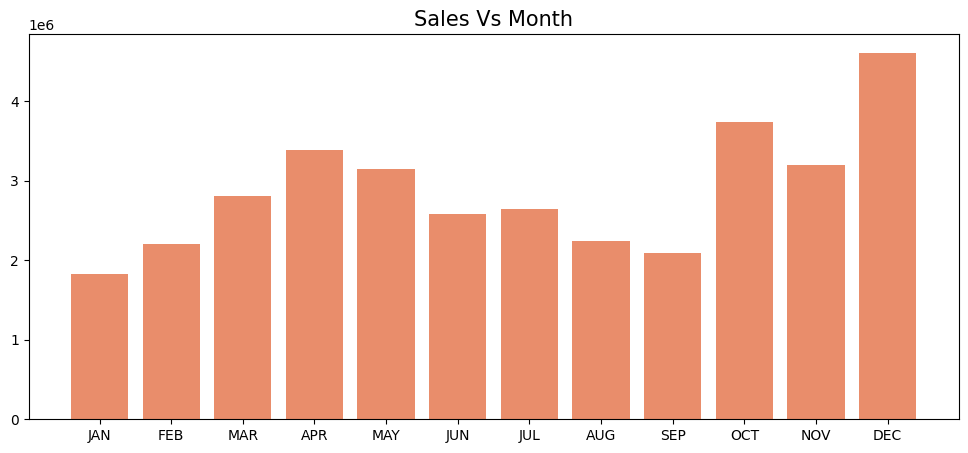

In [85]:
Monthly_Sales = df[['Month', 'Sales']].groupby(by = 'Month').sum()
months = (range(1,13))
plt.figure(figsize = (12,5))
plt.bar(months ,Monthly_Sales["Sales"])
plt.title("Sales Vs Month", fontsize = 15 )
xlim = (1,13)
plt.xticks(np.arange(1,13),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
 
plt.show()

**In the sales data analysis, December emerges as the peak month with the highest sales figures. On the other hand, January records the lowest sales, indicating a seasonal fluctuation in consumer purchasing behavior. This information provides valuable insights for business planning and resource allocation. It suggests the importance of strategic marketing and inventory management to capitalize on the peak season in December and mitigate the slower sales trend in January.**

In [86]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [87]:
highly_sold = df.groupby('Product')['Sales'].count().sort_values(ascending = False)[:10].reset_index()
highly_sold

,Product,Sales
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


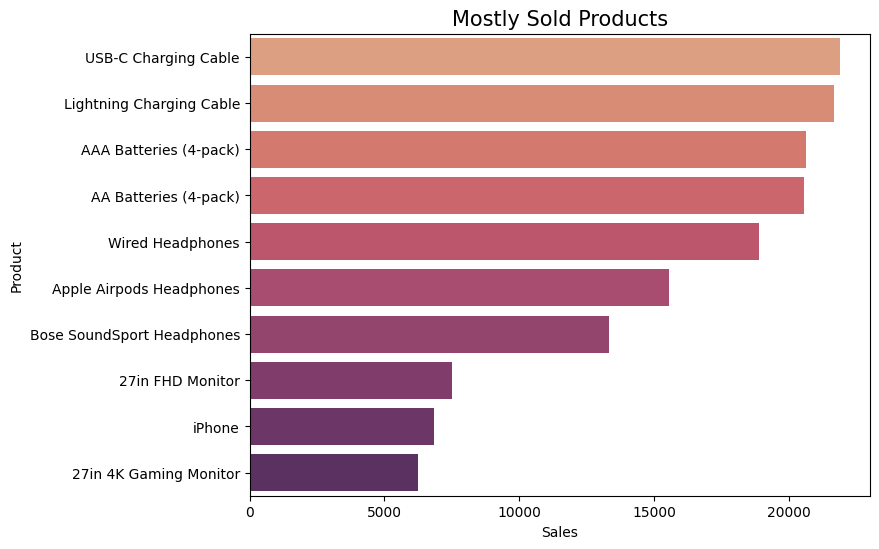

In [88]:
plt.figure(figsize = (8,6))
sns.barplot(y = 'Product', x = 'Sales', data= highly_sold, palette = 'flare')
plt.title("Mostly Sold Products", fontsize = 15)
plt.show()

**From the above graph we know the Top 10 items mostly bought. The highest sold products in the dataset are the "USB-C Charging Cable," "Lightning Charging Cable," and "AAA Batteries." These items stand out as top performers in terms of sales, suggesting their popularity among consumers. This insight can inform inventory management and marketing strategies to further capitalize on the demand for these products and potentially explore opportunities for cross-selling or bundling.**

In [89]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df

/tmp/ipykernel_32/3865244643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
/tmp/ipykernel_32/3865244643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,35


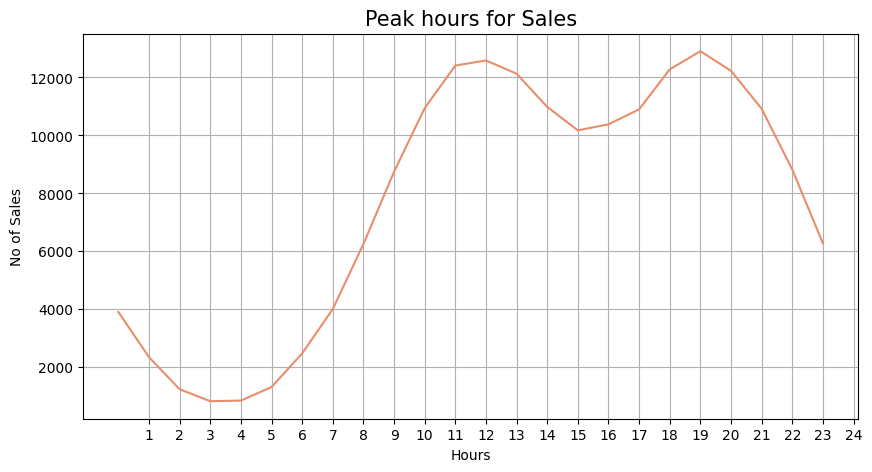

In [90]:
Peak_hours = df['Hour'].value_counts().sort_index()
plt.figure(figsize = (10,5))
plt.title('Peak hours for Sales', fontsize = 15)
plt.xticks(np.arange(1,25))
plt.plot(Peak_hours)
plt.xlabel('Hours')
plt.ylabel('No of Sales')
plt.grid()

**The above chart shows the highest number of sales is consistently observed after 10 am, with a peak between 12 pm and 9 pm. These active hours signify a strong consumer presence, indicating that the majority of purchases occur during this time. Businesses should target marketing efforts and inventory management to align with this peak period for maximizing sales and customer engagement. Additionally, they could strategically display advertisements during these hours to further enhance visibility and capitalize on consumer activity.**

In [91]:
df['City'].unique()

array([' New York City (NY)', ' San Francisco (CA)', ' Atlanta (GA)',
       ' Portland (OR)', ' Dallas (TX)', ' Los Angeles (CA)',
       ' Boston (MA)', ' Austin (TX)', ' Portland (ME)', ' Seattle (WA)'],
      dtype=object)

In [92]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
dtype: object

In [93]:
df['City'] = df['City'].str.strip()

/tmp/ipykernel_32/482149319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].str.strip()


In [94]:
City_with_Sales = df.groupby(['City'])[['Sales']].sum().sort_values(by = 'Sales') 
City_with_Sales.reset_index(inplace = True)
City_with_Sales            

,City,Sales
0,Portland (ME),449758.27
1,Austin (TX),1819581.75
2,Portland (OR),1870732.34
3,Seattle (WA),2747755.48
4,Dallas (TX),2767975.40
5,Atlanta (GA),2795498.58
6,Boston (MA),3661642.01
7,New York City (NY),4664317.43
8,Los Angeles (CA),5452570.80
9,San Francisco (CA),8262203.91


<Axes: ylabel='Sales'>

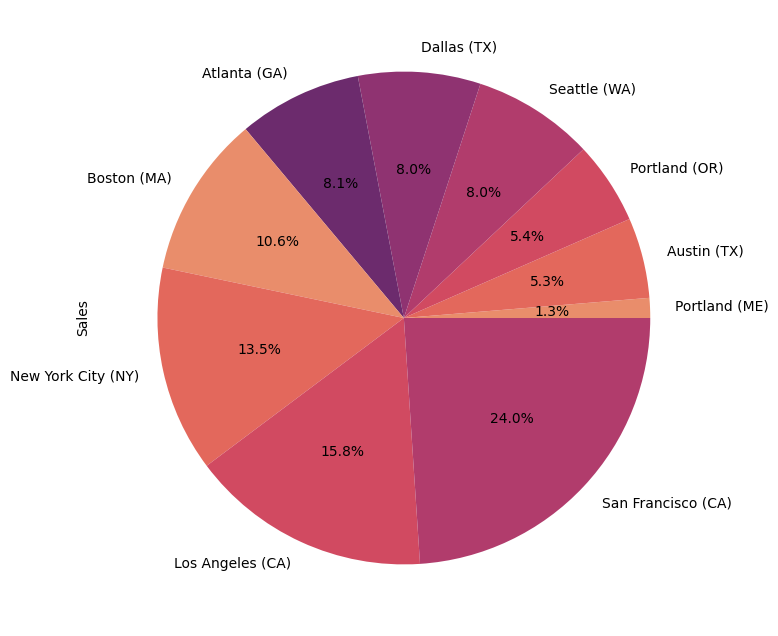

In [95]:
plt.figure(figsize = (10,8))
City_with_Sales['Sales'].plot(kind='pie', labels=City_with_Sales['City'], autopct='%1.1f%%')

**San Francisco, Los Angeles, and New York are the standout cities in terms of sales performance, recording the highest sales figures. This data suggests that these urban centers are key revenue generators, likely due to their large and diverse customer bases. Businesses should pay particular attention to these markets, allocating resources and marketing efforts accordingly to maximize sales and capture the robust consumer demand in these cities.**

Based on the findings from the exploratory data analysis (EDA) and the factors highlighted in the summary, here are some recommendations for businesses:

1. **Seasonal Sales Strategy**:
   - Develop a robust seasonal sales strategy that capitalizes on the peak in December and prepares for the lower sales in January. This could include special promotions, discounts, and holiday-themed marketing campaigns to attract more customers during the holiday season.

2. **Product Promotion**:
   - Given that "USB-C Charging Cable," "Lightning Charging Cable," and "AAA Batteries" are top-selling products, consider giving them more prominent placement in your marketing materials and on your website. Offering bundled deals or discounts on these items can also boost sales.

3. **Marketing Timing**:
   - Concentrate marketing efforts and customer engagement activities during the peak sales hours, which are between 12 pm and 9 pm. Utilize targeted advertisements, email campaigns, and social media promotions during this time to maximize visibility and engagement.

4. **Market Focus**:
   - Pay special attention to San Francisco, Los Angeles, and New York as key markets. Invest in localized marketing strategies, partnerships with local businesses, and tailored promotions to cater to the high consumer demand in these cities.

5. **Inventory Management**:
   - Optimize inventory management to match the seasonal demand. Stock up on popular products in preparation for the December peak and adjust inventory levels in January to minimize carrying costs.

6. **Data Monitoring and Feedback**:
   - Continuously monitor sales data and customer feedback to adapt your strategies in real-time. Stay agile and responsive to changing market conditions and consumer preferences.

7. **Customer Engagement**:
   - Enhance customer engagement by offering excellent customer service, convenient shopping experiences, and loyalty programs. Satisfied customers are more likely to make repeat purchases.

8. **Competitor Analysis**:
   - Keep an eye on competitors' strategies and pricing to ensure that your offerings remain competitive in the market.

9. **Diversification**:
   - Explore opportunities to diversify your product offerings based on customer preferences and market trends.

Implementing these recommendations can help businesses make the most of their sales data insights and drive growth, particularly in terms of seasonality, product selection, and market focus.

In [96]:
sns.set_palette('flare')